## Linear regression

某班主任为了了解本班同学的数学和其他科目考试成绩间关系，在某次阶段性测试中，他在全班学生中随机抽取1个容量为5的样本进行分析。

该样本中5位同学的数学和其他科目成绩对应如下表：


学生编号	|1	| 2 | 3	| 4	| 5
-- | -- | -- | -- | -- | -- |
数学分数m	| 89	| 91	| 93	| 95 | 97
物理分数p	| 87	| 89	| 89	| 92 | 93
语文分数c	| 72	| 76	| 74	| 71 | 76
英语分数e	| 83	| 88	| 82	| 91 | 89
化学分数ch	| 90	| 93	| 91	| 89 | 94

利用以上数据，建立m与其他变量的多元线性回归方程，并回答下列问题：


- 在线性回归中，利用梯度下降法，令参数向量θ^0初始值全为0，学习率α为1，算出经过第一次迭代后的参数向量θ^1；

In [80]:
import numpy as np
import matplotlib.pyplot as plt

train = np.array([[1,87,72,83,90],[1,89,76,88,93],[1,89,74,82,91],[1,92,71,91,89],[1,93,76,89,94]])
result = np.array([89,91,93,95,97])

prameter = np.array([0.0]*5)
learnrate = 1
newprameter = np.array([0.0]*5)

J = []
for time in range(1):
    Jtmp, Jdertmp = 0, [0]*5
    for i in range(5):
        for j in range(5):
            Jdertmp[i] += (np.dot(train[j],prameter.T) - result[j])*train[j][i]/5
        newprameter[i] = prameter[i] - learnrate*Jdertmp[i]
        Jtmp += (np.dot(train[j],prameter.T) - result[j])**2/(2*5)
    J.append(Jtmp)
    prameter = np.array(newprameter)
J = np.array(J)
print("prameter: ", prameter)

prameter:  [  93.  8376.  6864.6 8059.8 8501.8]


 - 	讨论（1）中所算出的θ^1是否可以使线性回归中的代价函数J(θ)下降，即J(θ^1 )<J(θ^0 )；

In [81]:
J = [J[0]]
for time in range(1):
    Jtmp, Jdertmp = 0, [0]*5
    for i in range(5):
        for j in range(5):
            Jdertmp[i] += (np.dot(train[j],prameter.T) - result[j])*train[j][i]/5
        newprameter[i] = prameter[i] - learnrate*Jdertmp[i]
        Jtmp += (np.dot(train[j],prameter.T) - result[j])**2/(2*5)
    J.append(Jtmp)
    prameter = np.array(newprameter)
J = np.array(J)
print("J0: ", J[0], "J1: ", J[1])

J0:  4704.5 J1:  3968209318612.5


 - 	讨论是否可以选取更佳的学习率α，经过第一次迭代后，使代价函数J(θ)下降得更快；

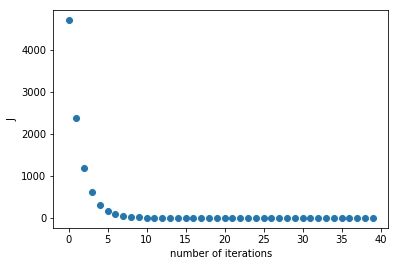

In [74]:
import numpy as np
import matplotlib.pyplot as plt

train = np.array([[1,87,72,83,90],[1,89,76,88,93],[1,89,74,82,91],[1,92,71,91,89],[1,93,76,89,94]])
result = np.array([89,91,93,95,97])

prameter = np.array([0.0]*5)
learnrate = 0.00001
newprameter = np.array([0.0]*5)

J = []
for time in range(40):
    Jtmp, Jdertmp = 0, [0]*5
    for i in range(5):
        for j in range(5):
            Jdertmp[i] += (np.dot(train[j],prameter.T) - result[j])*train[j][i]/5
        newprameter[i] = prameter[i] - learnrate*Jdertmp[i]
        Jtmp += (np.dot(train[j],prameter.T) - result[j])**2/(2*5)
    J.append(Jtmp)
    prameter = np.array(newprameter)
J = np.array(J)

plt.scatter(np.arange(40), J[:40])
plt.xlabel('number of iterations')
plt.ylabel('J')
plt.show()

 - 利用标准方程求出最优的多元线性回归方程（系数精确到0.01），并预测该班物理分数88、语文分数73、英语分数87、化学分数92同学的数学分数。

In [93]:
import numpy as np
import matplotlib.pyplot as plt

train = np.mat([[1,87,72,83,90],[1,89,76,88,93],[1,89,74,82,91],[1,92,71,91,89],[1,93,76,89,94]])
result = np.mat([89,91,93,95,97])

prameter = (train.T*train).I * (train.T*result.T)
print("prameter: ", prameter.T)

prameter:  [[-19.5      1.6875   0.375   -0.3125  -0.4375]]


In [99]:
testdata = np.mat([1,88,73,87,92])
testresult = prameter.T*testdata.T
print("testresult: ", testresult)

testresult:  [[88.9375]]


 - 	在L2正则化线性回归中，令正则化平衡系数λ为1，利用标准方程求出最优的L2正则化多元线性回归方程（系数精确到0.01），并比较其与（4）中得出的多元线性回归方程对数学分数的预测，哪个更好。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

train = np.mat([[1,87,72,83,90],[1,89,76,88,93],[1,89,74,82,91],[1,92,71,91,89],[1,93,76,89,94]])
result = np.mat([89,91,93,95,97])

eye = np.eyes()
prameter = (train.T*train + ).I * (train.T*result.T)
print("prameter: ", prameter.T)